In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
#import math 
import matplotlib.pyplot as plt
import random
#from itertools import accumulate
from tkinter import *
import seaborn as sns
from pandas_datareader.data import DataReader
from regression_output import rd2 as rd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.figure import Figure

C:\Users\tdang\OneDrive - Vizio\Documents\Python\marketdata-master\regression_output.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rd2['Price'][rd2['Price'] == inf] = np.nan


In [2]:

rd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122456 entries, 1 to 129119
Data columns (total 15 columns):
Date             122456 non-null datetime64[ns]
Outlet           122456 non-null object
Brand            122456 non-null object
Size (group)     122456 non-null object
UHD Segment      122456 non-null object
Sub Res          122456 non-null object
Year             122456 non-null int64
Week             122456 non-null int64
Units            122456 non-null float64
Dollars          122456 non-null int64
Stores           122456 non-null int64
Price            122456 non-null float64
PriceChange      122456 non-null float64
Productivity     122456 non-null float64
PriceDownFlag    122456 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 14.9+ MB


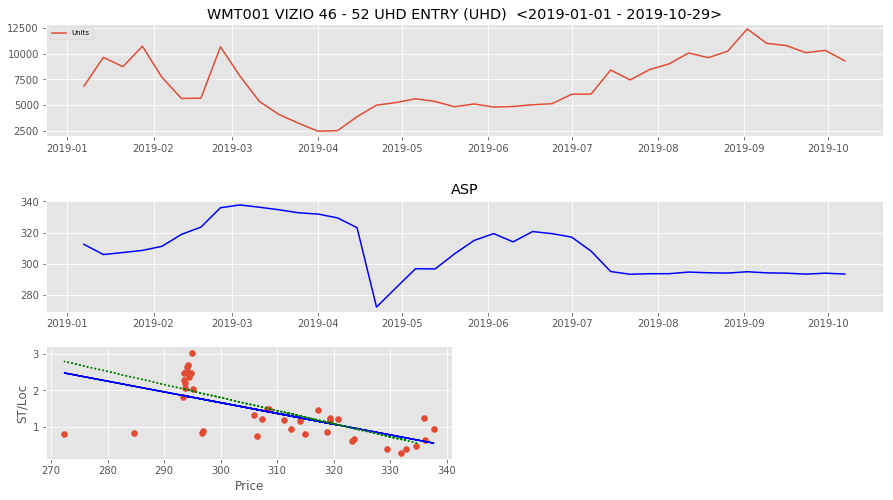

---------------------------------


In [3]:
#Functions
def VWAP(data):
    return(np.cumsum(data.Bought*data.Close)/
    np.cumsum(data.Bought)).round(2)

def ploting():
    conversion()
    
    df2 = rd[(rd['Brand'] == conversion.brand) & (rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet) & (rd['Sub Res'] == conversion.resolution)]
    
    df3 = df2[np.abs(df2.Productivity-df2.Productivity.mean())<=(3*df2.Productivity.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'

    X = df3[['Productivity','Price']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
    X = X.loc[:,X.isnull().mean() < .5]
    X = X[~np.isnan(X).any(axis=1)]
    Y = X['Productivity']
    X = X.drop('Productivity', axis=1)
    
    
    fig = plt.figure()
    
    top = plt.subplot2grid((15,6), (0, 0), rowspan=4, colspan=6)
    top.plot(df2['Date'], df2["Units"], label='Units')
    plt.title('{} {} {} {} ({})  <{} - {}>'.format(e1.get(), e2.get(), e3.get(), e4.get(), e5.get(), e6.get(), e7.get())) 
    plt.legend(loc='upper left', numpoints = 1, prop={'size':7})
    
    
    bottom = plt.subplot2grid((15,6), (6,0), rowspan=4, colspan=6)
    bottom.plot(df2['Date'], df2["Price"], label='ASP', color='blue')
    plt.title('ASP')
    plt.gcf().set_size_inches(15,8)

    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    y_pred2 = regressor.predict(X_test)
    
    
    scatplot = plt.subplot2grid((15,6), (11,0), rowspan=4, colspan=3)
    scatplot.scatter(X, Y)
    plt.plot(X, Y_pred, color='blue')
    plt.plot(X_test, y_pred2, color='green', linestyle="dotted")
    plt.ylabel('ST/Loc')
    plt.xlabel('Price')
    plt.show()
    
    
    print("---------------------------------")


def conversion():
#     print("Data conversion")
    conversion.outlet = e1.get()
    conversion.brand = e2.get()
    conversion.size = e3.get()
    conversion.segment = e4.get()
    conversion.resolution = e5.get()
    conversion.start_date = datetime.datetime.strptime(e6.get(),'%Y-%m-%d')
    conversion.end_date = datetime.datetime.strptime(e7.get(),'%Y-%m-%d')

#-----------------------------------------------------------------------------

def close_window (): 
     master.destroy()

master = Tk()

Label(master, text="Outlet").grid(row=0)
Label(master, text="Brand").grid(row=1)
Label(master, text="Size").grid(row=2)
Label(master, text="Segment").grid(row=3)
Label(master, text="Resolution").grid(row=4)
Label(master, text="Start Date").grid(row=5)
Label(master, text="End Date").grid(row=6)

e1 = Entry(master)
e1.insert(10,"WMT001")
e2 = Entry(master)
e2.insert(10,"VIZIO")
e3 = Entry(master)
e3.insert(10,"46 - 52")
e4 = Entry(master)
e4.insert(10,"UHD ENTRY")
e5 = Entry(master)
e5.insert(10,"UHD")
e6 = Entry(master)
e6.insert(10,"2019-01-01")
e7 = Entry(master)
e7.insert(10,"2019-10-29")

e1.grid(row=0, column=1)
e2.grid(row=1, column=1)
e3.grid(row=2, column=1)
e4.grid(row=3, column=1)
e5.grid(row=4, column=1)
e6.grid(row=5, column=1)
e7.grid(row=6, column=1)

Button(master, text='Cancel', command=close_window).grid(row=7, column=0, sticky=W, pady=4)

Button(master, text='Plot', command=ploting).grid(row=7, column=2, sticky=W, pady=4)


master.mainloop()

In [14]:
# web.DataReader(conversion.moniker, 'yahoo',  conversion.start_date, conversion.end_date)

In [7]:
plt.bar?

Signature:
plt.bar(
    ['x', 'height', 'width=0.8', 'bottom=None', '*', "align='center'", 'data=None', '**kwargs'],
)
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *width* and *height*. The vertical baseline
is *bottom* (default 0).

Each of *x*, *height*, *width*, and *bottom* may either be a scalar
applying to all bars, or it may be a sequence of length N providing a
separate value for each bar.

Parameters
----------
x : sequence of scalars
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : scalar or sequence of scalars
    The height(s) of the bars.

width : scalar or array-like, optional
    The width(s) of the bars (default: 0.8).

bottom : scalar or array-like, optional
    The y coordinate(s) of the bars bases (default: 0).

align : {'center', 'edge'}, optional, default: 'center'
    Alignment of the bars to the *x* coordinates:

    - 'cent

In [11]:
rd

,Date,Outlet,Brand,SKU,Size (group),UHD Segment,Sub Res,Year,Week,Units,Stores,Price,Productivity,PriceChange,PriceDownFlag
476,2018-05-28,Remaining Retail,ATYME,400AM7HD,37 - 40,HD/FHD,FHD,2018,22,359,66,151,5.44,1.0,0
477,2018-06-04,Remaining Retail,ATYME,400AM7HD,37 - 40,HD/FHD,FHD,2018,23,236,68,151,3.47,0.0,0
702,2016-12-26,Remaining Retail,AVERA DIGITAL,32AER10,32,HD/FHD,HD,2016,52,535,228,114,2.35,24.0,0
728,2016-12-26,Remaining Retail,AVERA DIGITAL,40AER10,37 - 40,HD/FHD,FHD,2016,52,507,242,168,2.10,168.0,0
887,2017-11-20,Remaining Retail,AVERA DIGITAL,49EQX20,46 - 52,UHD ENTRY,UHD,2017,47,1073,240,177,4.47,-87.0,1
888,2017-11-27,Remaining Retail,AVERA DIGITAL,49EQX20,46 - 52,UHD ENTRY,UHD,2017,48,522,240,199,2.17,22.0,0
1035,2017-11-13,Remaining Retail,AVERA DIGITAL,55EQX20,54 - 58,UHD ENTRY,UHD,2017,46,205,200,317,1.02,17.0,0
1036,2017-11-20,Remaining Retail,AVERA DIGITAL,55EQX20,54 - 58,UHD ENTRY,UHD,2017,47,543,200,309,2.71,-8.0,1
1037,2017-11-27,Remaining Retail,AVERA DIGITAL,55EQX20,54 - 58,UHD ENTRY,UHD,2017,48,586,200,231,2.93,-78.0,1
2864,2016-12-26,Remaining Retail,ELEMENT,ALL OTHER (SUPPRESSED),Other,SUPPRESSED,HD,2016,52,208,64,163,3.25,18.0,0
